# 1. Data Preprocessing

# (1) Reading the Training, the Development and the Testing Datasets 

In [1]:
import pandas as pd
from os import listdir

import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory1 = 'data/train'
paths1 = listdir(directory1)
paths1.sort()
paths1

['anger-ratings-0to1.train.txt',
 'fear-ratings-0to1.train.txt',
 'joy-ratings-0to1.train.txt',
 'sadness-ratings-0to1.train.txt']

In [3]:
## Define the path of training dataset
path1 = paths1[0]

In [4]:
# If you want to restore x_train vectors, y_train_vectors, x_test_vectors, y_test_vectors: you can change the 'emotion' here 
# and then restore those vectors

emotion = path1.split("-")[0]
emotion

'anger'

In [5]:
train = pd.read_csv('%s/%s' %(directory1,path1), delimiter='\t',header=None)
train.head()

,0,1,2,3
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [6]:
train.columns = ['SentID', 'Tweet', 'Emotion', 'Rating']
train[:10]

,SentID,Tweet,Emotion,Rating
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
5,10005,My blood is boiling,anger,0.875
6,10006,When you've still got a whole season of Wentwo...,anger,0.875
7,10007,@bt_uk why does tracking show my equipment del...,anger,0.875
8,10008,@TeamShanny legit why i am so furious with him...,anger,0.875
9,10009,How is it suppose to work if you do that? Wtf ...,anger,0.875


In [7]:
# check if there are any duplicates(subset = all of the columns)

assert train.duplicated().sum() == 0


In [8]:
# checking missing data & len(train),len(test)
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   857 non-null    int64  
 1   Tweet    857 non-null    object 
 2   Emotion  857 non-null    object 
 3   Rating   857 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 26.9+ KB
None


In [9]:
directory2 = 'data/dev'
paths2 = listdir(directory2)
paths2.sort()
paths2

['anger-ratings-0to1.dev.gold.txt',
 'fear-ratings-0to1.dev.gold.txt',
 'joy-ratings-0to1.dev.gold.txt',
 'sadness-ratings-0to1.dev.gold.txt']

In [10]:
## Define the path of training dataset
path2 = emotion + "-ratings-0to1.dev.gold.txt"

In [11]:
dev = pd.read_csv('%s/%s' %(directory2,path2), delimiter='\t',header=None)
dev.columns = train.columns
dev[:10]

,SentID,Tweet,Emotion,Rating
0,10857,@ZubairSabirPTI pls dont insult the word 'Molna',anger,0.479
1,10858,@ArcticFantasy I would have almost took offens...,anger,0.458
2,10859,@IllinoisLoyalty that Rutgers game was an abom...,anger,0.562
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708
5,10862,Sometimes I get mad over something so minuscul...,anger,0.646
6,10863,I think @Sam_Canaday &amp; @KYLEJDOWSON must a...,anger,0.250
7,10864,My eyes have been dilated. I hate the world ri...,anger,0.812
8,10865,@huwellwell One chosen by the CLP members! MP ...,anger,0.682
9,10866,@huwellwell One chosen by the CLP members! MP ...,anger,0.438


In [12]:
# check if there are any duplicates(subset = all of the columns)

assert dev.duplicated().sum() == 0


In [13]:
# checking missing data & len(train),len(test)
print(dev.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   84 non-null     int64  
 1   Tweet    84 non-null     object 
 2   Emotion  84 non-null     object 
 3   Rating   84 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ KB
None


In [14]:
directory3 = 'data/test'
paths3 = listdir(directory3)
paths3.sort()
paths3

['anger-ratings-0to1.test.gold.txt',
 'fear-ratings-0to1.test.gold.txt',
 'joy-ratings-0to1.test.gold.txt',
 'sadness-ratings-0to1.test.gold.txt']

In [15]:
## Define the path of training dataset
path3 = emotion + "-ratings-0to1.test.gold.txt"

In [16]:
test = pd.read_csv('%s/%s' %(directory3,path3), delimiter='\t',header=None)
test.columns = train.columns

test[:10]

,SentID,Tweet,Emotion,Rating
0,10941,At the point today where if someone says somet...,anger,0.319
1,10942,@CorningFootball IT'S GAME DAY!!!! T MIN...,anger,0.144
2,10943,This game has pissed me off more than any othe...,anger,0.898
3,10944,@spamvicious I've just found out it's Candice ...,anger,0.271
4,10945,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.646
5,10946,@moocowward @mrsajhargreaves @Melly77 @GaryBar...,anger,0.583
6,10947,wanna go home and focus up on this game . Don'...,anger,0.375
7,10948,@virginmedia I've been disconnected whilst on ...,anger,0.625
8,10949,@virginmedia I've been disconnected whilst on ...,anger,0.396
9,10950,I wanna see you smile I don't wanna see you ma...,anger,0.250


In [17]:
# check if there are any duplicates(subset = all of the columns)

assert test.duplicated().sum() == 0


In [18]:
# checking missing data & len(train),len(test)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SentID   760 non-null    int64  
 1   Tweet    760 non-null    object 
 2   Emotion  760 non-null    object 
 3   Rating   760 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 23.9+ KB
None


In [19]:
# plan to train models on the combined training and development sets
train = pd.concat([train, dev],axis=0,ignore_index=True)
train

,SentID,Tweet,Emotion,Rating
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
936,10936,@Jen_ny69 People will always get offended ever...,anger,0.562
937,10937,@gayla_weeks1 I try not to let my anger seep i...,anger,0.625
938,10938,I hope my hustle don't offend nobody,anger,0.292
939,10939,"Just watched Django Unchained, Other people ma...",anger,0.229


# (2) Define Text Data Cleaning Process

In [20]:
import string
import re

from nltk.corpus import stopwords
from nltk import bigrams

import wordsegment as ws # $ pip install wordsegment    
ws.load()     

import emoji  # $ pip install emoji

# As the glove model contains many words made with grammatical role, tense ,or derivational morphology,
# we do not need WordNetLemmatizer or SnowballStemmer here.

In [21]:
def normalize_text(text):
    
    # replace emoji to word
    # text = emoji.demojize(text)
    
    # remove characters outside the ascii code 128
    # text = ''.join([w if ord(w)<128 else ' ' for w in text])
    
    # replace '--' with a space
    text = text.replace('--',' ')
    
    # remove any newline characters
    text = text.replace('\n',' ')
    
    # tweets mentions user using '@' followed by username. Replace all those with <user> to be usable for Glove
    text = re.sub('@[^ ]+','<user>',text)
    
    # Replace all URLs with <url> to be usable for Glove
    text = re.sub(r'\d+','<number>',text)
   
    # Replace all numbers with <number> to be usable for Glove
    text = re.sub(r'http\S+','<url>',text)
    
    # turn some abbreviations into a whold word
    text = re.sub(r"\'s", "", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"fu\*k", " fuck", text)
    text = re.sub(r"f\*c+", "fuck", text)
    text = text.replace("wtf", "what the fuck")
    
    # prepare spaces between punctuation and words
    text1 = text.split('...')
    for i in range(len(text1)):
        text1[i] = text1[i].replace('/',' / ').replace('\\',' \ ').replace(',',' , ').replace('.',' . ').replace('?',' ? ').replace('!',' ! ').replace("'"," ' ").replace(':',' : ').replace(';',' ; ').replace('-',' - ').replace('(',' ( ').replace(')',' ) ').replace('[',' [ ').replace(']',' ] ').replace('&',' & ').replace('*',' * ').replace('{',' { ').replace('}',' } ').replace('-',' - ').replace('`',' ` ').replace('"',' " ').replace('>','> ').replace('<',' <')
    text1 = ' '.join(text1)
    
    # split into tokens by white space
    tokens = text1.split()
    
    return tokens

def clean_text(text):
   
    tokens = normalize_text(text)
    
    new_tokens1 = []
    for w in tokens:
        if w == "<user>":
            w = w
        elif w == "<url>":
            w = w
        elif w == "<number>":
            w = w
        elif w in emoji.UNICODE_EMOJI:
            w = w
        else:
            # prepare regex for char filtering: !"#$%&'()*+, -./:;<=>?@[\]^_`{|}~
            re_punc = re.compile('[%s]' %re.escape(string.punctuation))
            # remove punctuation from each word
            w = re_punc.sub('', w)
    
            # remove remaining tokens that are not alphabetic
            if w.isalpha():
                w = w
        new_tokens1.append(w) 
        
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in new_tokens1 if not w in stop_words]
    
    new_tokens2 = []
    for w in tokens:
        if w == "<user>":
            w = w
        elif w == "<url>":
            w = w
        elif w == "<number>":
            w = w
        elif w in emoji.UNICODE_EMOJI:
            w = w
        else:
            # word segment will convert the hashtag based joined words, for example, it will segment #iamthebest to ['i','am','the','best']
            w = ' '.join(ws.segment(w)) 
        new_tokens2.append(w)
        
    
    # make lower case
    tokens = [word.lower() for word in new_tokens2]
    
    
    clean_text = ' '.join(tokens)
    tokens = clean_text.split()
    
    new_tokens3 = []   
    # filter out short tokens
    for w in tokens:
        if w in emoji.UNICODE_EMOJI:
            w = w
        else:
            if len(w) > 1:
                w =w
        new_tokens3.append(w)
    
    return ' '.join(new_tokens3)

In [22]:
# do a sanity check
text = "@laura221b I've left it for my dad to deal with 😂 My work is done as soon as it's felt the wrath of my slipper 😷"
clean_text(text)

'<user> i left dad deal 😂 my work done soon felt wrath slipper 😷'

In [23]:
# prepare for clean Hashtag Emotion Intensity Lexicons...

def remove_stopwords(string):
    split_string = \
        [word for word in string.split()
         if word not in stopwords.words('english')]
    
    return " ".join(split_string)

def clean_str(string):  
    string = string.replace("\\n", " ")
    string = string.replace("_NEG", "")
    string = string.replace("_NEGFIRST", "")
    string = re.sub(r"@[A-Za-z0-9_s(),!?\'\`]+", "", string) # removing any twitter handle mentions

    string = re.sub(r"#", "", string)
    string = re.sub(r"\*", "", string)
    string = re.sub(r"\'s", "", string)
    string = re.sub(r"\'m", " am", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r",", "", string)
    string = re.sub(r"!", " !", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", " ?", string)
    string = re.sub(r"\s{2,}", " ", string)

    return remove_stopwords(string.strip().lower())

# (3) Clean Text Data

In [24]:
train['Tweet'] = train['Tweet'].apply(clean_text)

test['Tweet'] = test['Tweet'].apply(clean_text)

In [25]:
# do a sanity check
train[0:55]

,SentID,Tweet,Emotion,Rating
0,10000,how fuck who heck moved fridge i knock landlor...,anger,0.938
1,10001,so indian uber driver called someone n word if...,anger,0.896
2,10002,<user> i asked parcel delivered pick store add...,anger,0.896
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896
4,10004,do join <user> put phone talk rude taking mone...,anger,0.896
5,10005,my blood boiling,anger,0.875
6,10006,when still got whole season wentworth watch st...,anger,0.875
7,10007,<user> tracking show equipment delivered why s...,anger,0.875
8,10008,<user> legit furious people fucking idiots,anger,0.875
9,10009,how suppose work wtf dude thanks pissing,anger,0.875


In [26]:
# do a sanity check
train[0:10]

,SentID,Tweet,Emotion,Rating
0,10000,how fuck who heck moved fridge i knock landlor...,anger,0.938
1,10001,so indian uber driver called someone n word if...,anger,0.896
2,10002,<user> i asked parcel delivered pick store add...,anger,0.896
3,10003,ef whichever butt wipe pulled fire alarm davis...,anger,0.896
4,10004,do join <user> put phone talk rude taking mone...,anger,0.896
5,10005,my blood boiling,anger,0.875
6,10006,when still got whole season wentworth watch st...,anger,0.875
7,10007,<user> tracking show equipment delivered why s...,anger,0.875
8,10008,<user> legit furious people fucking idiots,anger,0.875
9,10009,how suppose work wtf dude thanks pissing,anger,0.875


In [27]:
# show the distribution of text length (from below: there is no need to truncate any of texts)
def show_text_len(train):
    train["text_len"] = train['Tweet'].map(lambda x: len(x.split()))
    return train["text_len"]

In [28]:
show_text_len(train).describe()

count    941.000000
mean      10.695005
std        4.586227
min        1.000000
25%        7.000000
50%       11.000000
75%       14.000000
max       25.000000
Name: text_len, dtype: float64

In [29]:
show_text_len(test).describe()

count    760.000000
mean      11.119737
std        4.560254
min        1.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       23.000000
Name: text_len, dtype: float64

There is not any reviews' length = 0 after text cleaning

In [30]:
train_tweets = list(train['Tweet'])
train_intensities = list(train['Rating'])

In [31]:
# check
train_tweets[:100]

['how fuck who heck moved fridge i knock landlord door angry mad',
 'so indian uber driver called someone n word if i moving vehicle i would jumped disgusted',
 '<user> i asked parcel delivered pick store address fuming poor customer service',
 'ef whichever butt wipe pulled fire alarm davis bc i sound asleep pissed angry upset tired sad tired h angry',
 'do join <user> put phone talk rude taking money acc willy nilly fuming',
 'my blood boiling',
 'when still got whole season wentworth watch stupid cunt work ruins us <user> raging old cunt',
 '<user> tracking show equipment delivered why service suddenly delayed we already <number> weeks fuming',
 '<user> legit furious people fucking idiots',
 'how suppose work wtf dude thanks pissing',
 'im mad power rangers im incensed im furious',
 'wont use using <user> <user> these guys cant get nothing right fuming',
 'bitches aggravate like inspires biggest cunt known man kind',
 'why <user> come glasgow night i working i fucking gutted waiting

In [32]:
# check
train_intensities[:10]

[0.938,
 0.8959999999999999,
 0.8959999999999999,
 0.8959999999999999,
 0.8959999999999999,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875]

In [33]:
test_tweets = list(test['Tweet'])
test_intensities = list(test['Rating'])

In [34]:
# show Max Text Length of All Datasets for comparsion

all_tweets_max_len = pd.DataFrame(np.array([max(show_text_len(train)), max(show_text_len(test))]))

all_tweets_max_len.index = ['train', 'test']
all_tweets_max_len.columns = ['max text length']

all_tweets_max_len

,max text length
train,25
test,23


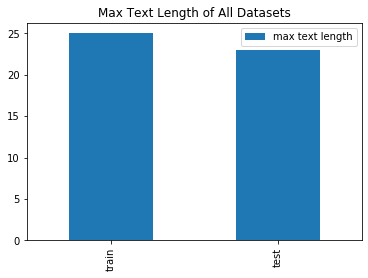

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
all_tweets_max_len.plot(kind='bar')
plt.title('Max Text Length of All Datasets')
plt.show()

In [36]:
'''
we set the length to which each tweet vector will be zero padded to.
this is based on the maximum length we got on the training set - we do not want to remove
any words as the maximun length of the training set is not very big.
'''

max_len = max(show_text_len(train))
max_len

25

# 2. Text Data Preparation（Feature Extraction)

# (1) Load Pre-trained Word Vectors

In [37]:
import numpy as np
import gensim
from nltk import word_tokenize

In [38]:
word_vector_path = "files/wv_models/"

# 1) Glove

In [39]:
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r', encoding = 'UTF-8')
    model = {}
    num = 1
    for line in f:
        try:
            splitLine = line.split()
            word = splitLine[0]
            coefs = np.asarray(splitLine[1:], dtype = 'float32')
            model[word] = coefs
            num += 1
        except Exception as e:
            print("Failed at line " + str(num))
    print("Done. Found %s word vectors." %len(model)," words loaded!")
    return model

In [40]:
# To download the pretrained glove model (2B tweets, 27B tokens) - [https://nlp.stanford.edu/projects/glove/   glove.twitter.27B.zip]
# choose glove.twitter.27B.200d.txt from glove.twitter.27B.zip. [200-dimension vectors]

wv_model_path1 = word_vector_path + "glove.twitter.27B.200d.txt"
 
wv_model_g = loadGloveModel(wv_model_path1)


Loading Glove Model
Done. Found 1193514 word vectors.  words loaded!


# 2) Word2Vec

In [41]:
# To download the pretrained word2vec model  - [https://github.com/FredericGodin/TwitterEmbeddings]

wv_model_path2 = word_vector_path + "word2vec_twitter_tokens.bin"
wv_model_w = gensim.models.KeyedVectors.load_word2vec_format(wv_model_path2, binary=True, unicode_errors='ignore')

In [42]:
words = list(wv_model_w.wv.vocab)
print('Word Vectors: %d' % len(words))

Word Vectors: 3039345


C:\Users\dell\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


# 3) Define Averaged Word Embeddings

In [43]:
w2v_dimensions_g = len(wv_model_g['word'])
w2v_dimensions_w = len(wv_model_w['word'])

In [44]:
print(w2v_dimensions_g,w2v_dimensions_w)

200 400


In [45]:
def get_averaged_embeddings(tweet, model, dimensions):
    tokens = word_tokenize(tweet)
    vector_list = []
    for token in tokens:
        try:
            vector_list.append(model[token])
        except Exception as e:
            pass
    if len(vector_list) == 0:
        uni_vec_rep = np.zeros(dimensions).tolist()
    else:
        uni_vec_rep = sum(vector_list) / float(len(vector_list))
    return uni_vec_rep

# (2) Load Lexicon Feature Vectors

In [46]:
import json
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import normalize

lexicons_path = "files/lexicons/"

In [47]:
paths2 = listdir(lexicons_path)
paths2.sort()
paths2

['0.Emoji_Vectors',
 '1.NRC-Emotion-Intensity-Lexicon',
 '3.NRC-Emotion-Lexicon',
 '4.NRC-Hashtag-Emotion-Lexicon',
 '5.NRC-Emoticon-Lexicon',
 '6.NRC-Emoticon-AffLexNegLex',
 '7.NRC-Hashtag-Sentiment-AffLexNegLex',
 '8.NRC-Hashtag-Sentiment-Lexicon',
 '9.DepecheMood_V1.0']

# 1) Emoji Vectors

In [48]:
with open(('%s%s/' %(lexicons_path, paths2[0])) + listdir('%s%s/' %(lexicons_path, paths2[0]))[0], encoding = 'UTF-8') \
as emoji_file:
    emoji_list = json.load(emoji_file)
    
emoji_dict = dict()
for emoji in emoji_list:
    emoji_dict[emoji["emoji"]] = (emoji["name"], emoji["polarity"])

In [49]:
# do a sanity check
print(emoji_dict["😂"])

('joy', 3)


In [50]:
poly_emoji_intensity = PolynomialFeatures(5)

def get_emoji_intensity(tweet):
    score = 0.0
    for emoji in emoji_dict.keys():
        count = tweet.count(emoji)
        score += count * emoji_dict[emoji][1]
        
    return normalize(poly_emoji_intensity.fit_transform(np.array([score]).reshape(1, -1))[0].reshape(1, -1))[0]

In [51]:
# do a sanity check
get_emoji_intensity("😂")

array([0.00387988, 0.01163963, 0.03491889, 0.10475666, 0.31426998,
       0.94280993])

# 2) Emotion Intensity Lexicon

In [52]:
affect_intensity_file_path = ('%s%s/' %(lexicons_path, paths2[1])) + listdir('%s%s/' %(lexicons_path, paths2[1]))[0]

def get_word_affect_intensity_dict(emotion):
    word_intensities = dict()

    with open(affect_intensity_file_path) as affect_intensity_file:
        for line in affect_intensity_file:
            word_int_array = line.replace("\n", "").split("\t")

            if (word_int_array[1] == emotion):
                word_intensities[word_int_array[0]] = float(word_int_array[2])

    return word_intensities

In [53]:
word_intensities = get_word_affect_intensity_dict(emotion)
word_intensities

{'outraged': 0.964,
 'brutality': 0.959,
 'hatred': 0.953,
 'hateful': 0.94,
 'terrorize': 0.939,
 'infuriated': 0.938,
 'violently': 0.938,
 'furious': 0.929,
 'enraged': 0.927,
 'furiously': 0.927,
 'screwyou': 0.924,
 'murderer': 0.922,
 'fury': 0.922,
 'execution': 0.917,
 'angered': 0.916,
 'savagery': 0.915,
 'slaughtering': 0.914,
 'veryangry': 0.913,
 'assassinate': 0.912,
 'fuckoff': 0.912,
 'annihilation': 0.912,
 'rage': 0.911,
 'loathe': 0.909,
 'damnation': 0.906,
 'roadrage': 0.906,
 'fucktard': 0.906,
 'homicidal': 0.906,
 'furor': 0.9,
 'hostile': 0.898,
 'annihilate': 0.898,
 'murder': 0.897,
 'raging': 0.896,
 'sopissed': 0.894,
 'pissed': 0.894,
 'rape': 0.894,
 'explosive': 0.894,
 'obliterated': 0.894,
 'vengeful': 0.894,
 'ferocious': 0.894,
 'infuriates': 0.894,
 'killing': 0.893,
 'combative': 0.891,
 'gofuckyourself': 0.886,
 'vengeance': 0.886,
 'wrath': 0.885,
 'torment': 0.885,
 'vicious': 0.884,
 'threatening': 0.882,
 'massacre': 0.882,
 'bloodthirsty': 0.

In [54]:
poly_emo_int = PolynomialFeatures(10)

def get_emo_int_vector(tweet):
    score = 0.0
    for word in word_intensities.keys():
        if word in tweet:
            score += tweet.count(word) * float(word_intensities[word])
    return normalize(poly_emo_int.fit_transform(np.array([score]).reshape(1, -1))[0].reshape(1, -1))[0]
    # return [score]

In [55]:
get_emo_int_vector("furious")

array([0.41320797, 0.3838702 , 0.35661542, 0.33129572, 0.30777372,
       0.28592179, 0.26562134, 0.24676223, 0.22924211, 0.21296592,
       0.19784534])

# 3) SentiWordNet

In [56]:
from nltk.corpus import sentiwordnet as swn

In [57]:
poly_sentiwordnet = PolynomialFeatures(5)

def get_sentiwordnetscore(tweet):
    
    score = np.zeros(2)
    
    for word in tweet.split():
        synsetlist = list(swn.senti_synsets(word))
        
        if synsetlist:
            score[0] += synsetlist[0].pos_score()
            score[1] += synsetlist[0].neg_score()
            
#     return tweet_score.tolist()
    return normalize(poly_sentiwordnet.fit_transform(np.array([score]).reshape(1, -1))[0].reshape(1, -1))[0]

In [58]:
get_sentiwordnetscore("furious")

array([9.37500185e-01, 2.34375046e-01, 2.34375046e-01, 5.85937616e-02,
       5.85937616e-02, 5.85937616e-02, 1.46484404e-02, 1.46484404e-02,
       1.46484404e-02, 1.46484404e-02, 3.66211010e-03, 3.66211010e-03,
       3.66211010e-03, 3.66211010e-03, 3.66211010e-03, 9.15527525e-04,
       9.15527525e-04, 9.15527525e-04, 9.15527525e-04, 9.15527525e-04,
       9.15527525e-04])

# 4) Sentiment Emotion Presence Lexicon

In [59]:
sentiment_emotion_lex_file_path = ('%s%s/' %(lexicons_path, paths2[2])) + listdir('%s%s/' %(lexicons_path, paths2[2]))[0]

def get_affect_presence_list(emotion):
    word_list = list()
    
    with open(sentiment_emotion_lex_file_path) as sentiment_emotion_lex_file:
        lines = sentiment_emotion_lex_file.readlines()[1:] 
        for line in lines:
            word_array = line.replace("\n", "").split("\t")

            if (word_array[1] == emotion and word_array[2] == '1'):
                word_list.append(word_array[0])
                
    return word_list

In [60]:
word_list = get_affect_presence_list(emotion)
word_list

['abandoned',
 'abandonment',
 'abhor',
 'abhorrent',
 'abolish',
 'abomination',
 'abuse',
 'accursed',
 'accusation',
 'accused',
 'accuser',
 'accusing',
 'actionable',
 'adder',
 'adversary',
 'adverse',
 'adversity',
 'advocacy',
 'affront',
 'aftermath',
 'aggravated',
 'aggravating',
 'aggravation',
 'aggression',
 'aggressive',
 'aggressor',
 'agitated',
 'agitation',
 'agony',
 'alcoholism',
 'alienate',
 'alienation',
 'allegation',
 'altercation',
 'ambush',
 'anarchism',
 'anarchist',
 'anarchy',
 'anathema',
 'anger',
 'angry',
 'anguish',
 'animosity',
 'animus',
 'annihilate',
 'annihilated',
 'annihilation',
 'annoy',
 'annoyance',
 'annoying',
 'antagonism',
 'antagonist',
 'antagonistic',
 'antichrist',
 'antipathy',
 'antisocial',
 'antithesis',
 'anxiety',
 'argue',
 'argument',
 'argumentation',
 'arguments',
 'armament',
 'armed',
 'arraignment',
 'arrogant',
 'arson',
 'assail',
 'assailant',
 'assassin',
 'assassinate',
 'assassination',
 'assault',
 'asshole',


In [61]:
def get_sentiment_emotion_feature(tweet):
    
    vector = np.zeros(1)
    for word in word_list:
        if word in tweet.split():
            vector[0] = 1.0
    
    return vector

In [62]:
get_sentiment_emotion_feature("furious")

array([1.])

# 5) Hashtag Emotion Intensity

In [63]:
hashtag_emotion_lex_file_path = ('%s%s/' %(lexicons_path, paths2[3])) + listdir('%s%s/' %(lexicons_path, paths2[3]))[0]
    
def get_hashtag_emotion_intensity(emotion):
    hastag_intensities = dict()
    
    with open(hashtag_emotion_lex_file_path) as hashtag_emotion_lex_file:
        for line in hashtag_emotion_lex_file:
            word_array = line.replace("\n", "").split("\t")
            
            if (word_array[0] == emotion):
                hastag_intensities[clean_str(word_array[1])] = float(word_array[2])

    return hastag_intensities

In [64]:
hashtag_emotion_intensities = get_hashtag_emotion_intensity(emotion)

In [65]:
poly_hashtag_emotion = PolynomialFeatures(10)

def get_hashtag_emotion_vector(tweet):
    score = 0.0
    for word in hashtag_emotion_intensities.keys():
        if word in tweet:
            score += tweet.count(word) * float(hashtag_emotion_intensities[word])
            
#     return [score]
    return normalize(poly_hashtag_emotion.fit_transform(np.array([score]).reshape(1, -1))[0].reshape(1, -1))[0]

In [66]:
get_hashtag_emotion_vector("furious")

array([9.02832881e-05, 2.27150070e-04, 5.71502825e-04, 1.43788412e-03,
       3.61767372e-03, 9.10195956e-03, 2.29002597e-02, 5.76163729e-02,
       1.44961082e-01, 3.64717774e-01, 9.17619079e-01])

# 6) Emoticon Sentiment Lexicon¶

In [67]:
listdir('%s%s/' %(lexicons_path, paths2[4]))

['bigrams-pmilexicon.txt', 'pairs-pmilexicon.txt', 'unigrams-pmilexicon.txt']

In [68]:
emoticon_lexicon_unigrams_file_path = ('%s%s/' %(lexicons_path, paths2[4])) + listdir('%s%s/' %(lexicons_path, paths2[4]))[2]
emoticon_lexicon_bigrams_file_path = ('%s%s/' %(lexicons_path, paths2[4])) + listdir('%s%s/' %(lexicons_path, paths2[4]))[0]
emoticon_lexicon_pairs_file_path = ('%s%s/' %(lexicons_path, paths2[4])) + listdir('%s%s/' %(lexicons_path, paths2[4]))[1]
pair_split_string = "---"
    
def get_emoticon_lexicon_unigram_dict():
    emoticon_lexicon_unigrams = dict()
    with open(emoticon_lexicon_unigrams_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            emoticon_lexicon_unigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return emoticon_lexicon_unigrams

def get_emoticon_lexicon_bigram_dict():
    emoticon_lexicon_bigrams = dict()
    with open(emoticon_lexicon_bigrams_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            emoticon_lexicon_bigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return emoticon_lexicon_bigrams

def get_emoticon_lexicon_pairs_dict():
    emoticon_lexicon_pairs = dict()
    with open(emoticon_lexicon_pairs_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            pair = word_array[0].split(pair_split_string)
            token_1 = clean_str(pair[0])
            token_2 = clean_str(pair[1])
            if token_1 and token_2:
                token_1_dict = None
                if token_1 in emoticon_lexicon_pairs.keys():
                    token_1_dict = emoticon_lexicon_pairs[token_1]
                else:
                    token_1_dict = dict()
                    
                token_1_dict[token_2] = np.array([float(val) for val in word_array[1:]])
                emoticon_lexicon_pairs[token_1] = token_1_dict
    
    return emoticon_lexicon_pairs

In [69]:
emoticon_lexicon_unigram_dict = get_emoticon_lexicon_unigram_dict()

In [70]:
emoticon_lexicon_bigram_dict = get_emoticon_lexicon_bigram_dict()

In [71]:
emoticon_lexicon_pairs_dict = get_emoticon_lexicon_pairs_dict()

In [72]:
poly_emoticon_lexicon = PolynomialFeatures(5)

def get_unigram_sentiment_emoticon_lexicon_vector(tokens):
    vector_list = np.zeros(3)
    counter = 0
    for token in tokens:
        word = clean_str(token)
        if word in emoticon_lexicon_unigram_dict.keys():
            vector_list += emoticon_lexicon_unigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_emoticon_lexicon.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]


def get_bigram_sentiment_emoticon_lexicon_vector(tokens):
    bi_tokens = bigrams(tokens)
    vector_list = np.zeros(3)
    counter = 0
    for bi_token in bi_tokens:
        word = clean_str(" ".join(bi_token))
        if word in emoticon_lexicon_bigram_dict.keys():
            vector_list += emoticon_lexicon_bigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_emoji_intensity.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0].tolist()

def get_pair_sentiment_emoticon_lexicon_vector(tokens):
    vector_list = np.zeros(3)
    counter = 0
    
    for i in range(len(tokens)):
        word_1 = clean_str(tokens[i])
        if word_1 in emoticon_lexicon_pairs_dict.keys():
            token_1_dict = emoticon_lexicon_pairs_dict[word_1]
            for j in range(i, len(tokens)):
                word_2 = clean_str(tokens[j])
                if word_2 in token_1_dict.keys():
                    vector_list += token_1_dict[word_2]
                    counter += 1
                    
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_emoji_intensity.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0].tolist()

def get_sentiment_emoticon_lexicon_vector(tweet):
    
    tokens = word_tokenize(tweet)
    final_list = np.asarray([])
    
    # Adding unigram features
    final_list = np.append(
        final_list,
        get_unigram_sentiment_emoticon_lexicon_vector(tokens)
    )
    
    final_list = np.append(
        final_list,
        get_bigram_sentiment_emoticon_lexicon_vector(tokens)
    )
    
    final_list = np.append(
        final_list,
        get_pair_sentiment_emoticon_lexicon_vector(tokens)
    )
   
    return final_list

In [73]:
get_sentiment_emoticon_lexicon_vector("furious")

array([5.21931637e-10, 1.32048704e-10, 3.39255564e-08, 2.76623768e-08,
       3.34083222e-11, 8.58316578e-09, 6.99858133e-09, 2.20516117e-06,
       1.79805449e-06, 1.46610597e-06, 8.45230551e-12, 2.17154094e-09,
       1.77064108e-09, 5.57905775e-07, 4.54907786e-07, 3.70924810e-07,
       1.43335476e-04, 1.16873542e-04, 9.52968880e-05, 7.77036164e-05,
       2.13843329e-12, 5.49399858e-10, 4.47972192e-10, 1.41150161e-07,
       1.15091670e-07, 9.38439770e-08, 3.62638754e-05, 2.95690061e-05,
       2.41101127e-05, 1.96590149e-05, 9.31680593e-03, 7.59678022e-03,
       6.19429772e-03, 5.05073506e-03, 4.11829167e-03, 5.41023623e-13,
       1.38998164e-10, 1.13336965e-10, 3.57109908e-08, 2.91181925e-08,
       2.37425262e-08, 9.17476048e-06, 7.48095854e-06, 6.09985850e-06,
       4.97373078e-06, 2.35715190e-03, 1.92198540e-03, 1.56715732e-03,
       1.27783597e-03, 1.04192779e-03, 6.05592386e-01, 4.93790715e-01,
       4.02629352e-01, 3.28297779e-01, 2.67688958e-01, 2.18269458e-01,
      

# 7) Emoticon Sentiment Aff-Neg Lexicon

In [74]:
listdir('%s%s/' %(lexicons_path, paths2[5]))

['Emoticon-AFFLEX-NEGLEX-bigrams.txt', 'Emoticon-AFFLEX-NEGLEX-unigrams.txt']

In [75]:
emoticon_afflex_unigrams_file_path = ('%s%s/' %(lexicons_path, paths2[5])) + listdir('%s%s/' %(lexicons_path, paths2[5]))[1]
emoticon_afflex_bigrams_file_path = ('%s%s/' %(lexicons_path, paths2[5])) + listdir('%s%s/' %(lexicons_path, paths2[5]))[0]
    
def get_emoticon_afflex_unigram_dict():
    emoticon_afflex_unigrams = dict()
    with open(emoticon_afflex_unigrams_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            emoticon_afflex_unigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return emoticon_afflex_unigrams

def get_emoticon_afflex_bigram_dict():
    emoticon_afflex_bigrams = dict()
    with open(emoticon_afflex_bigrams_file_path, encoding = 'UTF-8') as emoticon_lexicon_file:
        for line in emoticon_lexicon_file:
            word_array = line.replace("\n", "").split("\t")
            emoticon_afflex_bigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return emoticon_afflex_bigrams

In [76]:
emoticon_afflex_unigram_dict = get_emoticon_afflex_unigram_dict()

In [77]:
emoticon_afflex_bigram_dict = get_emoticon_afflex_bigram_dict()

In [78]:
poly_emoticon_lexicon = PolynomialFeatures(5)
# poly_emoticon_lexicon = PolynomialFeatures(1)

def get_unigram_sentiment_emoticon_afflex_vector(tokens):
    vector_list = np.zeros(3)
    counter = 0
    for token in tokens:
        word = clean_str(token)
        if word in emoticon_afflex_unigram_dict.keys():
            vector_list += emoticon_afflex_unigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_emoticon_lexicon.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]


def get_bigram_sentiment_emoticon_afflex_vector(tokens):
    bi_tokens = bigrams(tokens)
    vector_list = np.zeros(3)
    counter = 0
    for bi_token in bi_tokens:
        word = clean_str(" ".join(bi_token))
        if word in emoticon_afflex_bigram_dict.keys():
            vector_list += emoticon_afflex_bigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_emoticon_lexicon.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]

def get_sentiment_emoticon_afflex_vector(tweet):
    final_list = np.asarray([])
    tokens = word_tokenize(tweet)
    
    # Adding unigram features
    final_list = np.append(final_list, get_unigram_sentiment_emoticon_afflex_vector(tokens))
    
    # Adding bigram featunigram_list =ures
    final_list = np.append(final_list, get_bigram_sentiment_emoticon_afflex_vector(tokens))

    return final_list

In [79]:
get_sentiment_emoticon_afflex_vector("furious")

array([3.95719929e-10, 1.33357616e-10, 2.77003950e-08, 2.09731562e-08,
       4.49415166e-11, 9.33503312e-09, 7.06795365e-09, 1.93902765e-06,
       1.46812094e-06, 1.11157728e-06, 1.51452911e-11, 3.14590616e-09,
       2.38190038e-09, 6.53452318e-07, 4.94756755e-07, 3.74601543e-07,
       1.35731936e-04, 1.02768466e-04, 7.78104096e-05, 5.89135958e-05,
       5.10396310e-12, 1.06017038e-09, 8.02700428e-10, 2.20213431e-07,
       1.66733027e-07, 1.26240720e-07, 4.57416623e-05, 3.46329729e-05,
       2.62221080e-05, 1.98538818e-05, 9.50123549e-03, 7.19379259e-03,
       5.44672867e-03, 4.12395171e-03, 3.12242058e-03, 1.72003556e-12,
       3.57277417e-10, 2.70510044e-10, 7.42119264e-08, 5.61890300e-08,
       4.25431227e-08, 1.54149402e-05, 1.16713119e-05, 8.83685041e-06,
       6.69075817e-06, 3.20191636e-03, 2.42430810e-03, 1.83554756e-03,
       1.38977173e-03, 1.05225574e-03, 6.65086484e-01, 5.03565481e-01,
       3.81271007e-01, 2.88676620e-01, 2.18569441e-01, 1.65488291e-01,
      

# 8) Hashtag Sentiment Aff-Neg Lexicon

In [80]:
listdir('%s%s/' %(lexicons_path, paths2[6]))

['HS-AFFLEX-NEGLEX-bigrams.txt', 'HS-AFFLEX-NEGLEX-unigrams.txt']

In [81]:
hashtag_affneglex_unigrams_file_path = ('%s%s/' %(lexicons_path, paths2[6])) + listdir('%s%s/' %(lexicons_path, paths2[6]))[1]
hashtag_affneglex_bigrams_file_path = ('%s%s/' %(lexicons_path, paths2[6])) + listdir('%s%s/' %(lexicons_path, paths2[6]))[0]
    
def get_hashtag_affneglex_unigram_dict():
    hashtag_affneglex_unigrams = dict()
    with open(hashtag_affneglex_unigrams_file_path) as hashtag_sent_lex_file:
        for line in hashtag_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            hashtag_affneglex_unigrams[clean_str(word_array[0])] = np.array([float(val) for val in word_array[1:]])
    
    return hashtag_affneglex_unigrams

def get_hashtag_affneglex_bigram_dict():
    hashtag_affneglex_bigrams = dict()
    with open(hashtag_affneglex_bigrams_file_path) as hashtag_sent_lex_file:
        for line in hashtag_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            hashtag_affneglex_bigrams[clean_str(word_array[0])] = np.array([float(val) for val in word_array[1:]])

    return hashtag_affneglex_bigrams

In [82]:
hashtag_affneglex_unigram_dict = get_hashtag_affneglex_unigram_dict()

In [83]:
hashtag_affneglex_bigram_dict = get_hashtag_affneglex_bigram_dict()

In [84]:
poly_hashtag_sent_affneglex = PolynomialFeatures(5)

def get_unigram_sentiment_hashtag_affneglex_vector(tokens):
    vector_list = np.zeros(3)
    counter = 0
    for token in tokens:
        word = clean_str(token)
        if word in hashtag_affneglex_unigram_dict.keys():
            vector_list += hashtag_affneglex_unigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_hashtag_sent_affneglex.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]

def get_bigram_sentiment_hashtag_affneglex_vector(tokens):
    bi_tokens = bigrams(tokens)
    vector_list = np.zeros(3)
    counter = 0
    for bi_token in bi_tokens:
        word = clean_str(" ".join(bi_token))
        if word in hashtag_affneglex_bigram_dict.keys():
            vector_list += hashtag_affneglex_bigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_hashtag_sent_affneglex.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]

def get_sentiment_hashtag_affneglex_vector(tweet):
    final_list = np.asarray([])
    tokens = word_tokenize(tweet)
    
    # Adding unigram features
    final_list = np.append(final_list, get_unigram_sentiment_hashtag_affneglex_vector(tokens))
    # Adding bigram features
    final_list = np.append(final_list, get_bigram_sentiment_hashtag_affneglex_vector(tokens))

    return final_list

In [85]:
get_sentiment_hashtag_affneglex_vector("furious")

array([ 1.50661452e-05, -5.16768782e-06,  6.02645810e-05,  1.35595307e-04,
        1.77251692e-06, -2.06707513e-05, -4.65091904e-05,  2.41058324e-04,
        5.42381229e-04,  1.22035777e-03, -6.07973304e-07,  7.09006769e-06,
        1.59526523e-05, -8.26830051e-05, -1.86036762e-04, -4.18582713e-04,
        9.64233296e-04,  2.16952492e-03,  4.88143106e-03,  1.09832199e-02,
        2.08534843e-07, -2.43189322e-06, -5.47175974e-06,  2.83602708e-05,
        6.38106092e-05,  1.43573871e-04, -3.30732020e-04, -7.44147046e-04,
       -1.67433085e-03, -3.76724442e-03,  3.85693318e-03,  8.67809966e-03,
        1.95257242e-02,  4.39328795e-02,  9.88489790e-02, -7.15274513e-08,
        8.34139374e-07,  1.87681359e-06, -9.72757287e-06, -2.18870390e-05,
       -4.92458377e-05,  1.13441083e-04,  2.55242437e-04,  5.74295483e-04,
        1.29216484e-03, -1.32292808e-03, -2.97658818e-03, -6.69732341e-03,
       -1.50689777e-02, -3.39051998e-02,  1.54277327e-02,  3.47123987e-02,
        7.81028970e-02,  

# 9) Hashtag Sentiment Lexicon

In [86]:
listdir('%s%s/' %(lexicons_path, paths2[7]))

['HS-bigrams.txt', 'HS-pairs.txt', 'HS-unigrams.txt']

In [87]:
hash_sent_lex_unigrams_file_path = ('%s%s/' %(lexicons_path, paths2[7])) + listdir('%s%s/' %(lexicons_path, paths2[7]))[2]
hash_sent_lex_bigrams_file_path = ('%s%s/' %(lexicons_path, paths2[7])) + listdir('%s%s/' %(lexicons_path, paths2[7]))[0]
hash_sent_lex_pairs_file_path = ('%s%s/' %(lexicons_path, paths2[7])) + listdir('%s%s/' %(lexicons_path, paths2[7]))[1]
pair_split_string = "---"


def get_hash_sent_lex_unigram_dict():
    hash_sent_lex_unigrams = dict()
    with open(hash_sent_lex_unigrams_file_path) as hash_sent_lex_file:
        for line in hash_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            if clean_str(word_array[0]):
                hash_sent_lex_unigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return hash_sent_lex_unigrams

def get_hash_sent_lex_bigram_dict():
    hash_sent_lex_bigrams = dict()
    with open(hash_sent_lex_bigrams_file_path) as hash_sent_lex_file:
        for line in hash_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            if clean_str(word_array[0]):
                hash_sent_lex_bigrams[word_array[0]] = np.array([float(val) for val in word_array[1:]])
    
    return hash_sent_lex_bigrams

def get_hash_sent_lex_pairs_dict():
    hash_sent_lex_pairs = dict()
    with open(hash_sent_lex_pairs_file_path) as hash_sent_lex_file:
        for line in hash_sent_lex_file:
            word_array = line.replace("\n", "").split("\t")
            pair = word_array[0].split(pair_split_string)
            token_1 = clean_str(pair[0])
            token_2 = clean_str(pair[1])
            if token_1 and token_2:
                token_1_dict = None
                if token_1 in hash_sent_lex_pairs.keys():
                    token_1_dict = hash_sent_lex_pairs[token_1]
                else:
                    token_1_dict = dict()
                    
                token_1_dict[token_2] = np.array([float(val) for val in word_array[1:]])
                hash_sent_lex_pairs[token_1] = token_1_dict
    
    return hash_sent_lex_pairs

In [88]:
hash_sent_lex_unigram_dict = get_hash_sent_lex_unigram_dict()

In [89]:
hash_sent_lex_bigram_dict = get_hash_sent_lex_bigram_dict()

In [90]:
hash_sent_lex_pairs_dict = get_hash_sent_lex_pairs_dict()

In [91]:
poly_hash_sent_lex = PolynomialFeatures(5)

def get_unigram_sentiment_hash_sent_lex_vector(tokens):
    vector_list = np.zeros(3)
    counter = 0
    
    for token in tokens:
        word = clean_str(token)
        if word in hash_sent_lex_unigram_dict.keys():
            vector_list += hash_sent_lex_unigram_dict[word]
            counter += 1

    if counter > 0:
        vector_list /= counter
    
#     return vector_list
    return normalize(poly_hash_sent_lex.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]
    
def get_bigram_sentiment_hash_sent_lex_vector(tokens):
    bi_tokens = bigrams(tokens)
    vector_list = np.zeros(3)
    counter = 0
    for bi_token in bi_tokens:
        word = clean_str(" ".join(bi_token))
        if word in hash_sent_lex_bigram_dict.keys():
            vector_list += hash_sent_lex_bigram_dict[word]
            counter += 1
    if counter > 0:
        vector_list /= counter
    
#     return vector_list
    return normalize(poly_hash_sent_lex.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]

def get_pair_sentiment_hash_sent_lex_vector(tokens):
    vector_list = np.zeros(3)
    counter = 0
    
    for i in range(len(tokens)):
        word_1 = clean_str(tokens[i])
        if word_1 in hash_sent_lex_pairs_dict.keys():
            token_1_dict = hash_sent_lex_pairs_dict[word_1]
            for j in range(i, len(tokens)):
                word_2 = clean_str(tokens[j])
                if word_2 in token_1_dict.keys():
                    vector_list += token_1_dict[word_2]
                    counter += 1
    if counter > 0:
        vector_list /= counter
        
#     return vector_list
    return normalize(poly_hash_sent_lex.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]
    
def get_sentiment_hash_sent_lex_vector(tweet):
    final_list = np.asarray([])
    
    tokens = word_tokenize(tweet)
    
    # Adding unigram features
    final_list = np.append(final_list, get_unigram_sentiment_hash_sent_lex_vector(tokens))
    # Adding bigram features
    final_list = np.append(final_list, get_bigram_sentiment_hash_sent_lex_vector(tokens))
    # Adding pair features
    final_list = np.append(final_list, get_pair_sentiment_hash_sent_lex_vector(tokens))

    return final_list

In [92]:
get_sentiment_hash_sent_lex_vector("furious")

array([5.09887390e-09, 3.39075115e-09, 2.09053830e-07, 1.73361713e-07,
       2.25484951e-09, 1.39020797e-07, 1.15285539e-07, 8.57120703e-06,
       7.10783022e-06, 5.89429823e-06, 1.49947493e-09, 9.24488300e-08,
       7.66648834e-08, 5.69985268e-06, 4.72670710e-06, 3.91970833e-06,
       3.51419488e-04, 2.91421039e-04, 2.41666228e-04, 2.00406140e-04,
       9.97150826e-10, 6.14784720e-08, 5.09821475e-08, 3.79040203e-06,
       3.14326022e-06, 2.60660604e-06, 2.33693960e-04, 1.93794991e-04,
       1.60708041e-04, 1.33270083e-04, 1.44081990e-02, 1.19482626e-02,
       9.90831533e-03, 8.21665174e-03, 6.81380876e-03, 6.63105299e-10,
       4.08831839e-08, 3.39031281e-08, 2.52061735e-06, 2.09026805e-06,
       1.73339301e-06, 1.55406483e-04, 1.28873669e-04, 1.06870848e-04,
       8.86246052e-05, 9.58145235e-03, 7.94559463e-03, 6.58902970e-03,
       5.46407341e-03, 4.53118282e-03, 5.90736160e-01, 4.89878767e-01,
       4.06240929e-01, 3.36882721e-01, 2.79366159e-01, 2.31669498e-01,
      

# 10) Depeche Mood

In [93]:
depeche_mood_file_path = ('%s%s/' %(lexicons_path, paths2[8])) + listdir('%s%s/' %(lexicons_path, paths2[8]))[0]

In [94]:
def get_depeche_vector_dict():
    depeche_vector_dict = dict()
    with open(depeche_mood_file_path) as depeche_mood_file:
        lines = depeche_mood_file.readlines()[1:] 
        for line in lines:
            word_array = line.replace("\n", "").split("\t")
            depeche_vector_dict[word_array[0].split("#")[0]] = np.array([float(val) for val in word_array[1:]])
    
    return depeche_vector_dict

In [95]:
depeche_vector_dict = get_depeche_vector_dict()

In [96]:
print(len(depeche_vector_dict["0"]))

8


In [97]:
poly_depm = PolynomialFeatures(5)

def get_depeche_mood_vector(tweet):
    vector_list = np.zeros(8)
    tokens = word_tokenize(tweet)
    counter = 0
    
    for token in tokens:
        if token in depeche_vector_dict.keys():
            vector_list += np.array(depeche_vector_dict[token])
            counter += 1
    
    if counter > 0:
        vector_list /= counter
        
    return normalize(poly_depm.fit_transform(vector_list.reshape(1, -1))[0].reshape(1, -1))[0]

In [98]:
get_depeche_mood_vector("i am so mad about power rangers. i am incensed. i am furious.")

array([9.34469068e-01, 5.98056709e-02, 1.49434297e-01, ...,
       1.06644824e-05, 5.70178406e-06, 3.04846875e-06])

# (3)  Prepare Sentence Vectors as Inputs

In [99]:
def is_active_vector_method(string):
    return int(string)


def vectorize_tweets(tweet_list, bin_string, vector_dict):

    vectors = list()
    frames = list()

    '''Pre-trained Word embeddings'''
    index = 0
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = \
                pd.DataFrame(list(map(lambda x: get_averaged_embeddings(x, wv_model_g, w2v_dimensions_g), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    index = 1
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = \
                pd.DataFrame(list(map(lambda x: get_averaged_embeddings(x, wv_model_w, w2v_dimensions_w), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])


    '''NRC Emotion Intensity Lexicon'''
    index = 2
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_emo_int_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    '''WordNet'''
    index = 3
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_sentiwordnetscore(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    '''NRC Sentiment Lexicon'''
    index = 4
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_sentiment_emotion_feature(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    index = 5
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_sentiment_emoticon_lexicon_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    index = 6
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_sentiment_emoticon_afflex_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    '''NRC Hashtag Lexicon'''
    index = 7
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_hashtag_emotion_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    index = 8
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_sentiment_hash_sent_lex_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    index = 9
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_sentiment_hashtag_affneglex_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    '''Emoji Polarities'''
    index = 10
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_emoji_intensity(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])
     
    '''Depeche Mood'''
    index = 11
    if is_active_vector_method(bin_string[index]):
        if index not in vector_dict.keys():
            tmp_vector = pd.DataFrame(list(map(lambda x: get_depeche_mood_vector(x), tweet_list)))
            vector_dict[index] = tmp_vector
        frames.append(vector_dict[index])

    vectors = pd.concat(frames, axis=1)

    return vectors.values.tolist()

In [100]:
feature_index_mapping = \
    {
        0: "Glove[Twitter]",
        1: "Word2Vec[Twitter]",
        2: "NRC-Emotion Intensity Lexicon",
        3: "Wordnet-Affect",
        4: "NRC-Emotion-Lexicon",
        5: "NRC-Emoticon-Lexicon",
        6: "NRC-Emoticon-AffLexNegLex",
        7: "NRC-Hashtag-Emotion",
        8: "NRC-Hashtag-Sentiment-Lexicon",
        9: "NRC-Hashtag-Sentiment-AffLexNegLex",
        10: "Emoji Intensity",
        11: "Depeche Mood"
    
    }


def get_features_from_identifier(bin_string):
    features = list()
    for i in range(len(bin_string)):
        if int(bin_string[i]):
            features.append(feature_index_mapping[i])

    return features

In [101]:
string1 = "110011001010"
get_features_from_identifier(string1)

['Glove[Twitter]',
 'Word2Vec[Twitter]',
 'NRC-Emotion-Lexicon',
 'NRC-Emoticon-Lexicon',
 'NRC-Hashtag-Sentiment-Lexicon',
 'Emoji Intensity']

In [102]:
train_vector_dict = dict()
test_vector_dict = dict()

In [103]:
x_train = vectorize_tweets(train_tweets, string1, train_vector_dict)

In [104]:
print(len(x_train))
dimension = len(x_train[0])
print(dimension)

941
943


In [105]:
x_train = np.array(x_train)
score_train = np.array(train_intensities)

In [106]:
x_test = vectorize_tweets(test_tweets, string1, test_vector_dict)

In [107]:
print(len(x_test))
print(len(x_test[0]))

760
943


In [108]:
train_vectors_path = "files/" + emotion + "_vectors/train_vectors.npy"
test_vectors_path = "files/" + emotion + "_vectors/test_vectors.npy"

In [109]:
# Save vectors_dict
import pickle
with open(train_vectors_path, 'wb') as train_vectors_file:
    pickle.dump(train_vector_dict, train_vectors_file)

with open(test_vectors_path, 'wb') as test_vectors_file:
    pickle.dump(test_vector_dict, test_vectors_file)

In [110]:
# Restore vectors_dict
import pickle
with open(train_vectors_path, 'rb') as train_vectors_file:
    train_vector_dict = pickle.load(train_vectors_file)

with open(test_vectors_path, 'rb') as test_vectors_file:
    test_vector_dict = pickle.load(test_vectors_file)

In [111]:
x_train_vectors_path = "files/" + emotion + "_vectors/x_train.npy"
y_train_vectors_path = "files/" + emotion + "_vectors/y_train.npy"

x_test_vectors_path = "files/" + emotion + "_vectors/x_test.npy"
y_test_vectors_path = "files/" + emotion + "_vectors/y_test.npy"

In [112]:
# Save train_vectors
import pickle
with open(x_train_vectors_path, 'wb') as x_train_vectors_file:
    x_train = pickle.dump(x_train, x_train_vectors_file)
with open(y_train_vectors_path, 'wb') as y_train_vectors_file:
    score_train = pickle.dump(score_train, y_train_vectors_file)

with open(x_test_vectors_path, 'wb') as x_test_vectors_file:
    x_test = pickle.dump(x_test, x_test_vectors_file)
with open(y_test_vectors_path, 'wb') as y_test_vectors_file:
    test_intensities = pickle.dump(test_intensities, y_test_vectors_file)

In [113]:
# Restore vectors_dict
with open(x_train_vectors_path, 'rb') as x_train_vectors_file:
    x_train = pickle.load(x_train_vectors_file)
with open(y_train_vectors_path, 'rb') as y_train_vectors_file:
    score_train = pickle.load(y_train_vectors_file)

with open(x_test_vectors_path, 'rb') as x_test_vectors_file:
    x_test = pickle.load(x_test_vectors_file)
with open(y_test_vectors_path, 'rb') as y_test_vectors_file:
    test_intensities = pickle.load(y_test_vectors_file)

In [114]:
x_train = np.array(x_train)
score_train = np.array(score_train)

x_test = np.array(x_test)
test_intensities = np.array(test_intensities)

In [115]:
print(x_train.shape,'\n',score_train.shape,'\n',x_test.shape, '\n', test_intensities.shape)

(941, 943) 
 (941,) 
 (760, 943) 
 (760,)


# 3. Train a model

In [116]:
import time

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import scipy

import torch

In [117]:
def evaluate_lists(pred, gold):
    if len(pred) == len(gold):
        gold_scores=gold
        pred_scores=pred         
        
        # lists storing gold and prediction scores where gold score >= 0.5
        gold_scores_range_05_1=[]
        pred_scores_range_05_1=[]
         
            
        for i in range(len(gold_scores)):
            if(gold_scores[i]>=0.5):
                gold_scores_range_05_1.append(gold_scores[i])
                pred_scores_range_05_1.append(pred_scores[i])
                
        # return zero correlation if predictions are constant
        if np.std(pred_scores)==0 or np.std(gold_scores)==0:
            return (0,0,0,0)
        
        pears_corr=scipy.stats.pearsonr(pred_scores,gold_scores)[0]                                    
        spear_corr=scipy.stats.spearmanr(pred_scores,gold_scores)[0]   


        pears_corr_range_05_1=scipy.stats.pearsonr(pred_scores_range_05_1,gold_scores_range_05_1)[0]                                    
        spear_corr_range_05_1=scipy.stats.spearmanr(pred_scores_range_05_1,gold_scores_range_05_1)[0]           
        
      
        return np.array([pears_corr,spear_corr,pears_corr_range_05_1,spear_corr_range_05_1])
    else:
        raise ValueError('Predictions and gold data have different number of lines.')

# 1) XGBoost

from sklearn.metrics import make_scorer
import scipy
def pearson_score(ground_truth, predictions):
    score = scipy.stats.pearsonr(predictions,ground_truth)[0]
    return score
PS = make_scorer(pearson_score, greater_is_better=True)

In [118]:
from sklearn.model_selection import GridSearchCV
ml_model = XGBRegressor(objective="reg:squarederror",seed=0)

# specify parameters and distributions to sample from
param_dist = {
     "max_depth": range(3, 11),
     "n_estimators": [100,300,500,700,900,1000,3000]
 }


# run randomized search
grid_search = GridSearchCV(ml_model,param_grid=param_dist, cv=5, n_jobs=-1,return_train_score=True)

trainingtime = pd.DataFrame(columns = ["Model", "Training Time(Seconds)"])
start_time_XG =time.time()

grid_search.fit(x_train, score_train)
trainingtime.loc[0] = ["XGBoost", round((time.time()-start_time_XG), 2)] 

In [119]:
grid_search.best_score_

-6.549811213701339

In [120]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
grid_search.best_estimator_.score(x_train, score_train)

0.999949962607008

In [122]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,11.642683,0.317591,0.009973,6.308264e-04,3,100,"{'max_depth': 3, 'n_estimators': 100}",-7.378642,-6.192932,-10.947039,...,-6.558108,3.488396,7,0.993411,0.995546,0.994963,0.994215,0.993169,0.994261,0.000901
1,29.848627,0.216946,0.010971,3.162980e-07,3,300,"{'max_depth': 3, 'n_estimators': 300}",-7.254624,-6.256571,-10.831378,...,-6.549893,3.471471,6,0.999893,0.999950,0.999982,0.999943,0.999934,0.999941,0.000029
2,35.790747,0.553266,0.010971,6.307510e-04,3,500,"{'max_depth': 3, 'n_estimators': 500}",-7.254550,-6.256521,-10.830824,...,-6.549845,3.471363,5,0.999893,0.999950,0.999984,0.999943,0.999934,0.999941,0.000029
3,41.835990,0.751625,0.011769,1.163088e-03,3,700,"{'max_depth': 3, 'n_estimators': 700}",-7.254508,-6.256492,-10.830795,...,-6.549837,3.471355,4,0.999893,0.999950,0.999984,0.999943,0.999934,0.999941,0.000029
4,48.877970,0.729892,0.012367,1.352993e-03,3,900,"{'max_depth': 3, 'n_estimators': 900}",-7.254476,-6.256476,-10.830775,...,-6.549834,3.471349,3,0.999893,0.999950,0.999984,0.999943,0.999934,0.999941,0.000029
5,52.629943,0.614345,0.011968,4.101908e-07,3,1000,"{'max_depth': 3, 'n_estimators': 1000}",-7.254460,-6.256468,-10.830766,...,-6.549833,3.471345,2,0.999893,0.999950,0.999984,0.999943,0.999934,0.999941,0.000029
6,120.933398,0.752036,0.014561,4.883830e-04,3,3000,"{'max_depth': 3, 'n_estimators': 3000}",-7.254140,-6.256312,-10.830569,...,-6.549811,3.471283,1,0.999893,0.999950,0.999984,0.999943,0.999934,0.999941,0.000029
7,13.425719,0.124255,0.009375,4.887334e-04,4,100,"{'max_depth': 4, 'n_estimators': 100}",-7.974948,-6.254964,-10.632250,...,-6.778814,3.499364,14,0.999606,0.999828,0.999835,0.999778,0.999779,0.999765,0.000083
8,24.699988,0.210243,0.010173,3.988743e-04,4,300,"{'max_depth': 4, 'n_estimators': 300}",-7.966026,-6.253286,-10.632172,...,-6.777028,3.499038,10,0.999897,0.999951,0.999984,0.999945,0.999936,0.999943,0.000028
9,31.538511,0.076220,0.010572,4.885388e-04,4,500,"{'max_depth': 4, 'n_estimators': 500}",-7.965983,-6.253238,-10.632206,...,-6.777029,3.499057,12,0.999897,0.999951,0.999984,0.999945,0.999936,0.999943,0.000028


In [123]:
grid_search.best_params_

{'max_depth': 3, 'n_estimators': 3000}

In [124]:
ml_model_best = grid_search.best_estimator_

ml_model_best.fit(x_train, score_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [125]:
from sklearn.model_selection import learning_curve
def plot_learningcurve(classifier, X, y, plt_titile):
    # check whether there is overfitting or underfitting by learning_curve
    # choose five kinds of fraction of the maximum size of the training set: np.linspace(0.1,1.0,5)
    train_size, train_score, test_score = learning_curve(classifier, X, y, cv=5, train_sizes=np.linspace(0.1,1.0,5))
    train_scores_mean = np.mean(train_score, axis=1)
    train_scores_std = np.std(train_score, axis=1)
    test_scores_mean = np.mean(test_score, axis=1)
    test_scores_std = np.std(test_score, axis=1)
    plt.fill_between(train_size, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_size, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_size, train_scores_mean,'o--', color="r",label="Training score")
    plt.plot(train_size, test_scores_mean,'o-', color="g",label="Testing score")
    plt.grid()
    plt.title(plt_titile)
    plt.legend(loc="best")
    return plt.show()

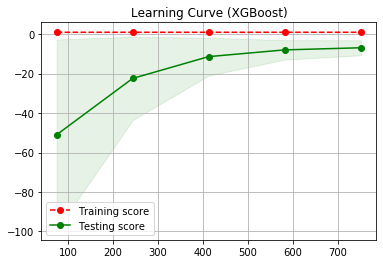

In [126]:
plot_learningcurve(grid_search.best_estimator_, x_train, score_train, 'Learning Curve (XGBoost)')

In [127]:
y_pred = ml_model_best.predict(x_test)

score1_1 = evaluate_lists(y_pred, test_intensities)
score1_1

array([0.55461669, 0.54493187, 0.41524068, 0.40655476])

In [128]:
from sklearn.metrics import r2_score

score1_2 = r2_score(test_intensities, y_pred)
score1_2

0.29585706858528227

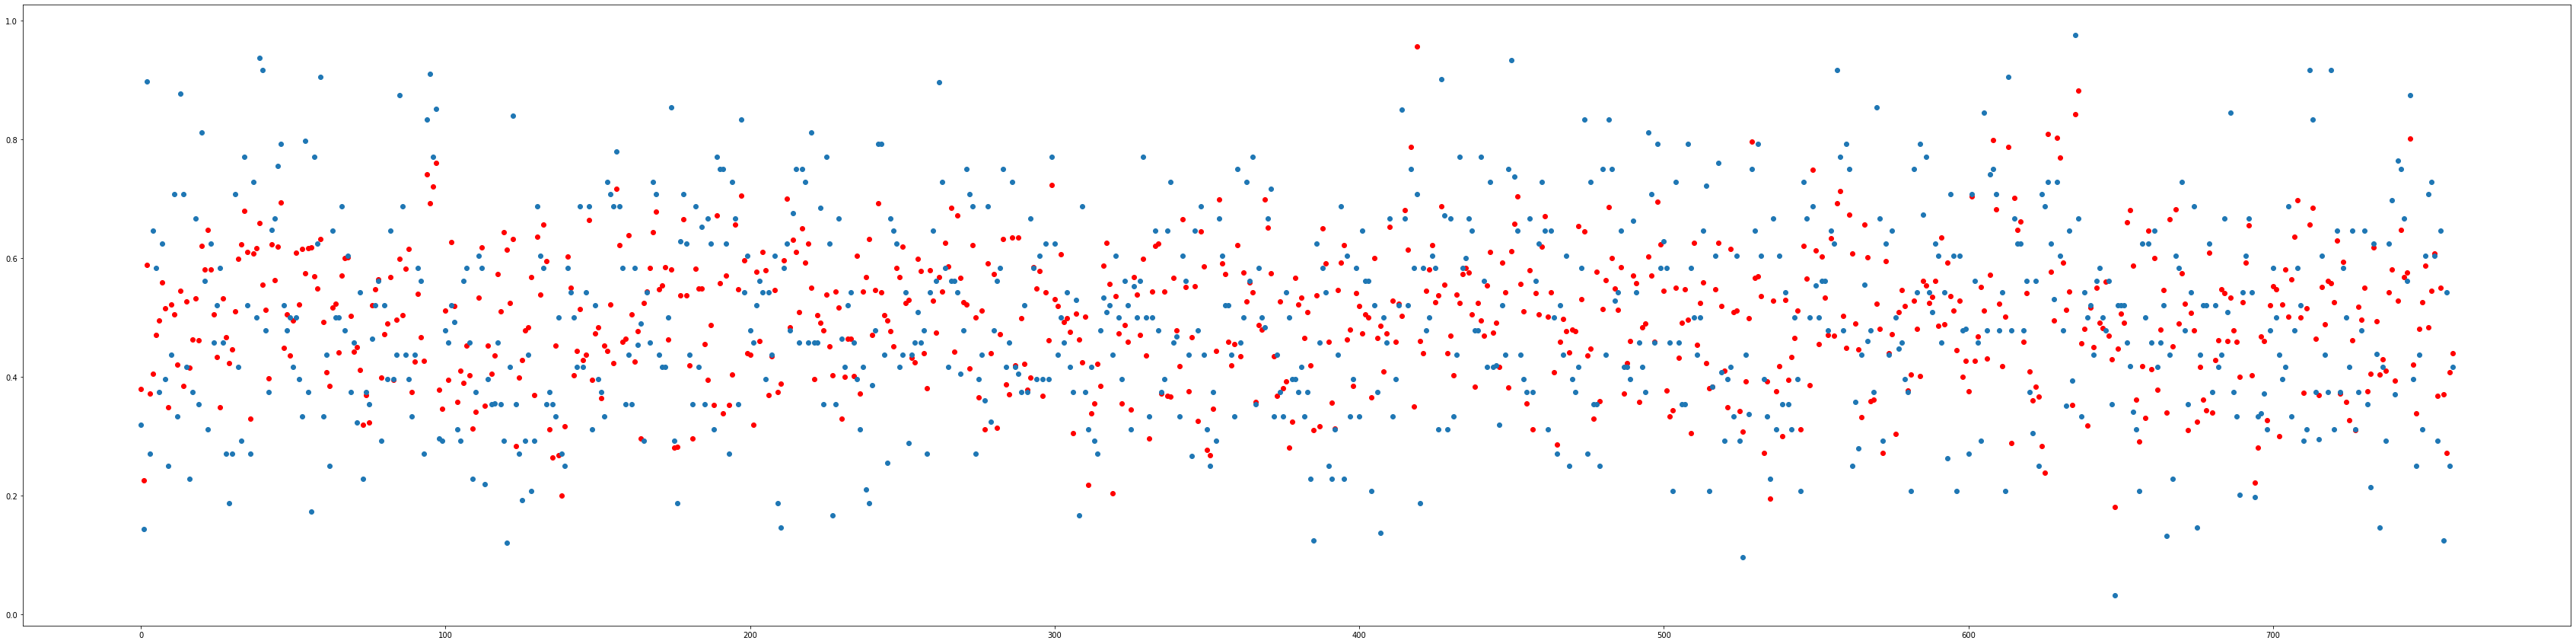

In [129]:
plt.figure(figsize=(60,15))
plt.scatter(range(len(y_pred)),y_pred,c='r')
plt.scatter(range(len(test_intensities)),test_intensities)

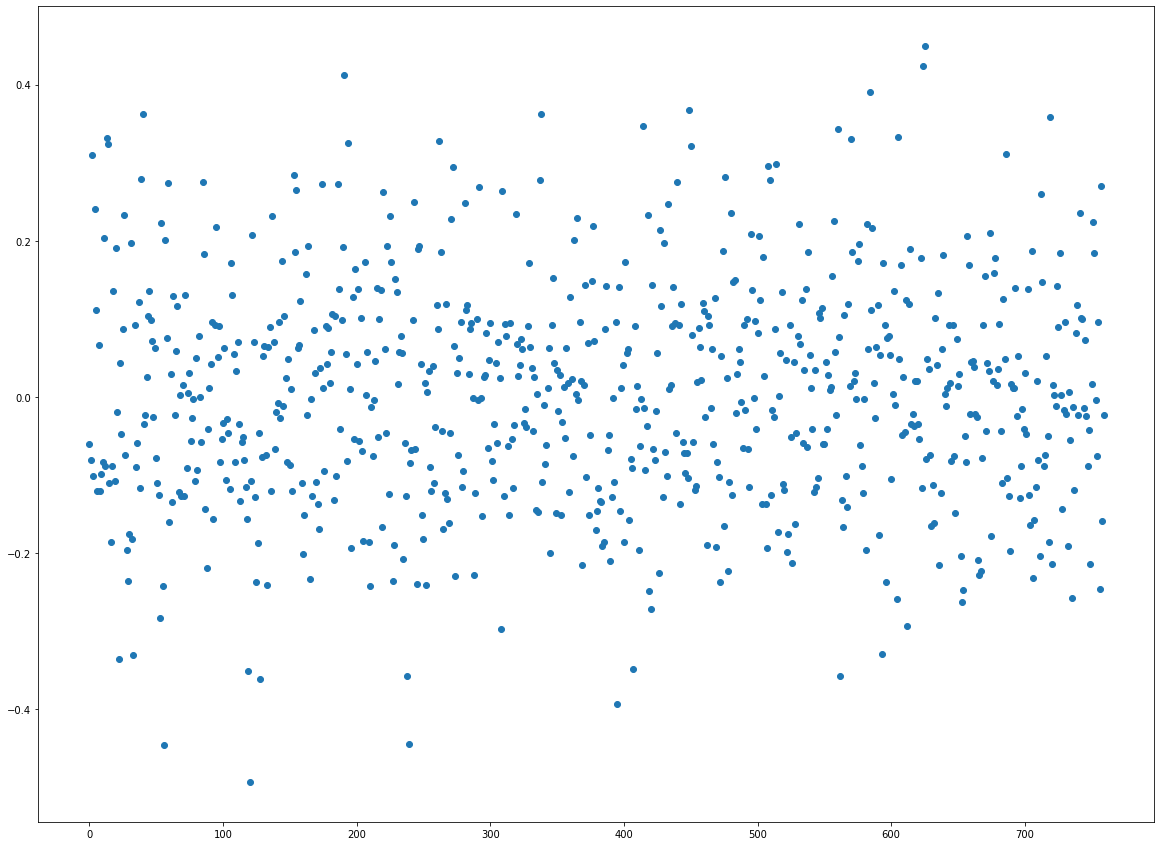

In [130]:
plt.figure(figsize=(20,15))
plt.scatter(range(len(y_pred)),test_intensities-y_pred)

In [131]:
xgboost_path = "files/final_models/" + "xgboost_"+ emotion + ".dat"

In [132]:
import pickle
with open(xgboost_path, 'wb') as xgboost_file:
    pickle.dump(grid_search.best_estimator_, xgboost_file)

In [133]:
#model = pickle.load(open(xgboost_path,'rb'))
#model

# 2) Feedfoward Neural Network

In [134]:
import torch.nn.functional as F

class LinearModel(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(LinearModel,self).__init__() 
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.hidden.weight = torch.nn.init.xavier_normal(self.hidden.weight)
        self.dropout = torch.nn.Dropout(p=0.25)
        self.predict = torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        out=F.relu(self.hidden(x))
        out=self.dropout(out)
        out=F.sigmoid(self.predict(out))
        return out


In [135]:
import torch.utils.data as Data
batch_size = 128
dataset = Data.TensorDataset(torch.tensor(x_train.astype(np.float32)), torch.tensor(score_train.astype(np.float32)))
data_iter = Data.DataLoader(dataset = dataset,batch_size = batch_size, shuffle = True, num_workers = 2)

for X,y in data_iter:
    print(X, '\n', y)
    break

tensor([[ 0.2440,  0.0271, -0.0346,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0814,  0.4505, -0.2346,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1232,  0.0045, -0.0948,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0734, -0.0395, -0.0841,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1377,  0.1137,  0.0534,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0956,  0.0615,  0.0533,  ...,  0.0000,  0.0000,  0.0000]]) 
 tensor([0.4720, 0.1250, 0.2920, 0.4580, 0.6040, 0.5830, 0.5000, 0.5420, 0.3960,
        0.7500, 0.4170, 0.2500, 0.4790, 0.4170, 0.3750, 0.5000, 0.2500, 0.6460,
        0.3330, 0.5420, 0.3750, 0.6670, 0.3960, 0.3120, 0.6250, 0.5210, 0.7920,
        0.5000, 0.5830, 0.3330, 0.5210, 0.2960, 0.5210, 0.5560, 0.1670, 0.3120,
        0.3140, 0.8120, 0.7500, 0.5210, 0.4380, 0.5210, 0.4380, 0.7710, 0.2320,
        0.4170, 0.4380, 0.6880, 0.3120, 0.7500, 0.4790, 0.3960, 0.5620, 0.4790,
        0.6250, 0.6670, 0.6040, 0.5000, 0.6040, 0.2080, 0.6250, 0.3960, 0.2710,
    

In [136]:
# architecure: 1→10000→1
net = LinearModel(x_train.shape[1],10000,1)
print(net)
print(net.parameters())    

C:\Users\dell\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  import sys


LinearModel(
  (hidden): Linear(in_features=943, out_features=10000, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (predict): Linear(in_features=10000, out_features=1, bias=True)
)
<generator object Module.parameters at 0x000001EFE35C22B0>


In [137]:
para = list(net.parameters())
print(para)

[Parameter containing:
tensor([[ 0.0047, -0.0052, -0.0049,  ...,  0.0172,  0.0048,  0.0007],
        [ 0.0138,  0.0203,  0.0220,  ...,  0.0132,  0.0103,  0.0014],
        [ 0.0092,  0.0163,  0.0215,  ..., -0.0106,  0.0057, -0.0040],
        ...,
        [-0.0083, -0.0004, -0.0025,  ..., -0.0057,  0.0119,  0.0209],
        [-0.0106,  0.0130, -0.0027,  ..., -0.0111,  0.0235, -0.0149],
        [ 0.0169, -0.0047, -0.0195,  ..., -0.0008, -0.0135,  0.0076]],
       requires_grad=True), Parameter containing:
tensor([0.0071, 0.0075, 0.0305,  ..., 0.0157, 0.0164, 0.0222],
       requires_grad=True), Parameter containing:
tensor([[-0.0036, -0.0079, -0.0070,  ..., -0.0035, -0.0080,  0.0008]],
       requires_grad=True), Parameter containing:
tensor([-0.0099], requires_grad=True)]


In [138]:
optimizer = torch.optim.Adam(net.parameters())
print(optimizer)

loss_func = torch.nn.MSELoss()

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


In [139]:
dataset_test = Data.TensorDataset(torch.tensor(x_test.astype(np.float32)), torch.tensor(test_intensities.astype(np.float32)))
data_iter_test = Data.DataLoader(dataset = dataset_test,batch_size = batch_size, num_workers = 2)

In [140]:
# Train the model


start_time_NN =time.time()

train_losses = []

test_losses = []

num_epochs = 1000
train_interval = 10
test_interval = 10

for epoch in range(num_epochs):
    net.train()
    for X,y in data_iter:
        prediction = net(X)
        loss = loss_func(prediction,y.view(-1,1))
    
    # reset gradient, equal to net.zero_grad()
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()
        
        

    if((epoch+1)%train_interval==0):
        print("epoch{},train_loss{}".format(epoch+1,loss.data))
        train_losses.append(loss.item())
   

      
    net.eval()
    with torch.no_grad():
        
        for X_test, y_test in data_iter_test:
            
            prediction1 = net(X_test)
            loss1 = loss_func(prediction1, y_test.view(-1,1))
            
    if ((epoch+1) % test_interval == 0):       
        print("epoch{},test_loss{}".format(epoch+1,loss1.data))
        #test_loss += float(loss1.item())
        test_losses.append(loss1.item())
        
trainingtime.loc[1] = ["Simple Neural Network", round((time.time()-start_time_NN), 2)]

C:\Users\dell\Anaconda3\envs\tf2\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch10,train_loss0.00823897309601307
epoch10,test_loss0.014725497923791409
epoch20,train_loss0.002543835900723934
epoch20,test_loss0.015580733306705952
epoch30,train_loss0.0016759744612500072
epoch30,test_loss0.014443433843553066
epoch40,train_loss0.0007263236329890788
epoch40,test_loss0.01479044184088707
epoch50,train_loss0.0019638058729469776
epoch50,test_loss0.015132195316255093
epoch60,train_loss0.0008849122677929699
epoch60,test_loss0.014850055798888206
epoch70,train_loss0.0007915255264379084
epoch70,test_loss0.015029175207018852
epoch80,train_loss0.0007220920524559915
epoch80,test_loss0.01553339697420597
epoch90,train_loss0.000396826711948961
epoch90,test_loss0.014794884249567986
epoch100,train_loss0.00037091528065502644
epoch100,test_loss0.014519613236188889
epoch110,train_loss0.0005361890071071684
epoch110,test_loss0.01454173307865858
epoch120,train_loss0.0007048692787066102
epoch120,test_loss0.014227136969566345
epoch130,train_loss0.0004300723085179925
epoch130,test_loss0.014

In [141]:
train_x = range(len(train_losses))
train_y = train_losses

train_iters = len(data_iter)
#test_x = np.arange(1, len(test_losses)+1) * train_iters*test_interval 
test_x = range(len(test_losses))
test_y = test_losses


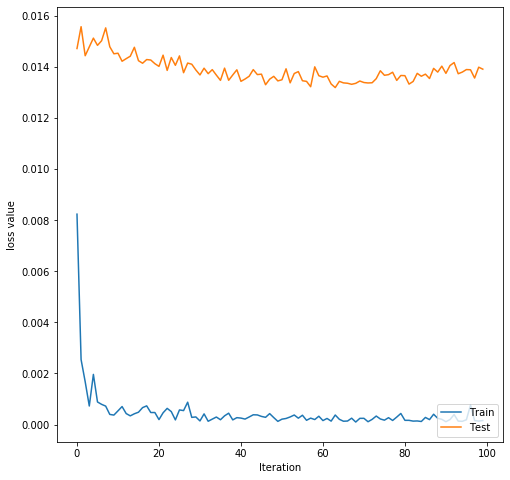

In [142]:
plt.figure(figsize=(8,8))
plt.plot(train_x, train_y, label='Train')
plt.plot(test_x, test_y, label='Test')
plt.legend(loc='lower right')
plt.ylabel('loss value')
plt.xlabel('Iteration')
plt.show()

In [143]:
y_pred_tensor = net(torch.tensor(x_test.astype(np.float32)))
# len(y_pred)
y_pred_array = y_pred_tensor.detach().numpy()
y_pred_a = np.concatenate((y_pred_array), axis=None)
y_pred_a.shape

(760,)

In [144]:
score2_1 = evaluate_lists(y_pred_a, test_intensities)
score2_1

array([0.6235144 , 0.62792961, 0.38876514, 0.41259645])

In [145]:
from sklearn.metrics import r2_score

score2_2 = r2_score(test_intensities, y_pred_a)
score2_2

0.36160034344465564

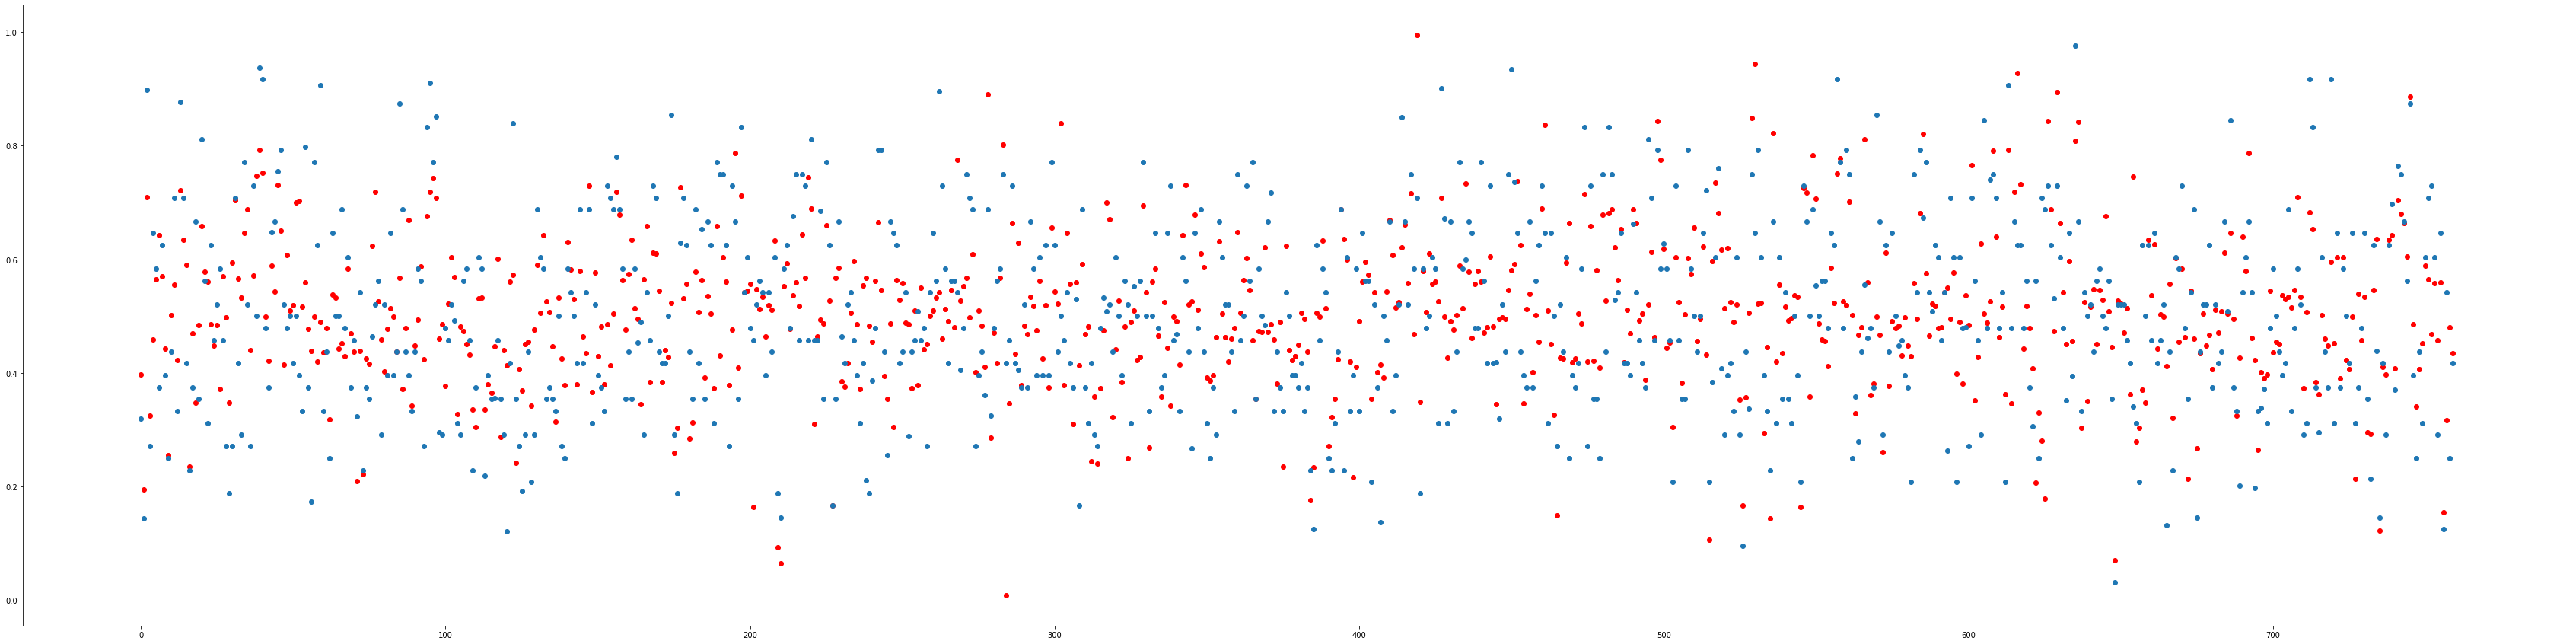

In [146]:
plt.figure(figsize=(60,15))
plt.scatter(range(len(y_pred_a)),y_pred_a,c='r')
plt.scatter(range(len(test_intensities)),test_intensities)

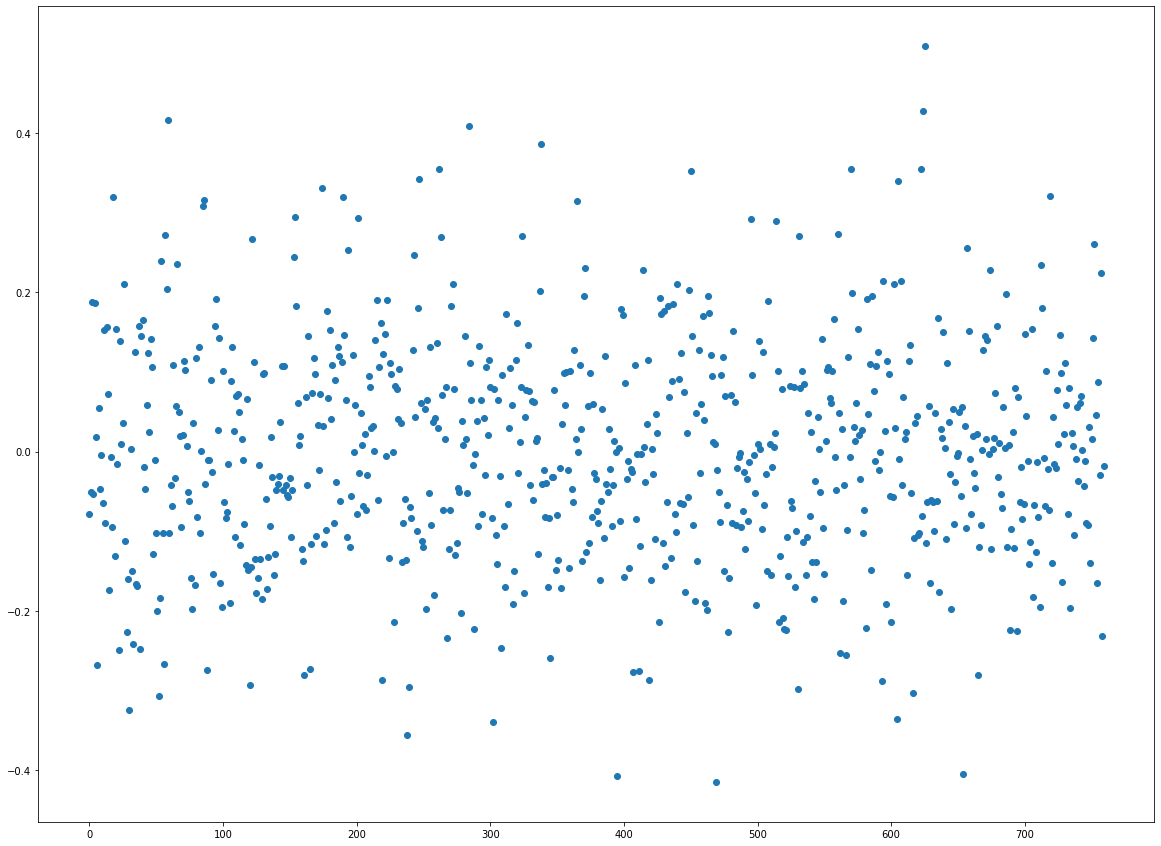

In [147]:
plt.figure(figsize=(20,15))
plt.scatter(range(len(y_pred_a)),test_intensities-y_pred_a)

In [148]:
simple_neural_network_path = "files/final_models/" + "simpleNN_"+ emotion + ".pkl.tar"
simple_neural_network_path

'files/final_models/simpleNN_anger.pkl.tar'

In [149]:
#torch.save(net, simple_neural_network_path) 
torch.save({'state_dict': net.state_dict()}, simple_neural_network_path)

# 4. Compare the Performance and Training Time Results

In [150]:
trainingtime

,Model,Training Time(Seconds)
0,XGBoost,1029.93
1,Simple Neural Network,2574.92


In [151]:
trainingtime.to_csv("training_time_"+emotion+".csv",mode='w')

In [152]:
all_score = pd.DataFrame(data = [score1_1,score2_1], columns = ['pears-corr','spear-corr','pears-corr-range-05-1','spear-corr-range-05-1'],\
             index = ['xgboost','simpleNN'])
all_score

,pears-corr,spear-corr,pears-corr-range-05-1,spear-corr-range-05-1
xgboost,0.554617,0.544932,0.415241,0.406555
simpleNN,0.623514,0.627930,0.388765,0.412596


In [153]:
all_score.to_csv('score_'+emotion+'.csv',mode='w')

In [154]:
r2_score = pd.DataFrame(data = [score1_2,score2_2], columns = ['R-squared score'],\
             index = ['xgboost','simpleNN'])
r2_score

,R-squared score
xgboost,0.295857
simpleNN,0.361600


In [156]:
r2_score.to_csv('r2_score_'+emotion+'.csv',mode='w')